In [79]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import librosa.display
import matplotlib.pyplot as plt


## Feature Extraction from Audio Files

In the context of audio signal processing and speech emotion recognition, mel, mfcc, chroma, and sound files are important concepts.

A sound file, also known as an audio file, is a digital file that stores audio data. Examples of sound file formats include WAV, MP3, and FLAC.soundfile is a Python library used for reading and writing sound files in various formats. It provides an easy-to-use interface for reading and writing sound files, with support for a wide range of audio formats, including WAV, FLAC, AIFF, and Ogg Vorbis. It is built on top of the C library libsndfile, which is a cross-platform library for reading and writing sound files.

The soundfile module is useful for working with audio files in Python, as it provides a high-level interface for reading and writing audio data, with support for many common audio formats. It can be used to read and write audio data to and from NumPy arrays, making it easy to process audio data using Python's powerful scientific computing libraries.


Mel Frequency Cepstral Coefficients (MFCC) are a feature extraction technique used in speech processing and speech recognition. The MFCC algorithm involves converting a sound signal into a series of frequency coefficients that are useful for identifying different speech sounds. MFCC is an important feature for speech emotion recognition as it captures the timbre of speech.

Chroma is another feature extraction technique that is useful for music analysis and is particularly important in music emotion recognition. It represents the distribution of the 12 chromatic pitches within an audio signal. Chroma features are useful for identifying different musical chords and harmonies.

Mel Spectrogram is a visual representation of the power spectral density (PSD) of a sound signal as a function of time. It provides a way to see how the distribution of energy in different frequency bands changes over time. Mel Spectrogram is also used as a feature extraction technique in speech and music analysis. It is particularly useful for identifying different phonemes and musical notes.

In summary, sound files are digital files that store audio data, while mel, mfcc, and chroma are feature extraction techniques that are useful for analyzing and recognizing different aspects of audio signals, such as speech and music.

In [80]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

This is a function that extracts audio features from a given audio file. It takes in the file name and three Boolean parameters mfcc, chroma, and mel, which determine which features to extract.

The function reads in the audio file using the soundfile.SoundFile method, which returns the audio data X and the sampling rate sample_rate.

If chroma is True, the function computes the Short Time Fourier Transform (STFT) of the audio data X using the librosa.stft method, and then computes the chroma feature using the librosa.feature.chroma_stft method. The resulting chroma feature is then averaged over time and added to the result array.

If mfcc is True, the function computes the Mel-Frequency Cepstral Coefficients (MFCCs) using the librosa.feature.mfcc method. The resulting MFCCs are then averaged over time and added to the result array.

If mel is True, the function computes the Mel Spectrogram feature using the librosa.feature.melspectrogram method. The resulting Mel Spectrogram feature is then averaged over time and added to the result array.

Finally, the function returns the concatenated feature vector result.

In [81]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [103]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/Users/iqrabismi/Desktop/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        print(emotion)
        print(file_name)
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

This code defines a function load_data which takes an optional argument test_size that determines the percentage of the data to be used for testing.

The function first initializes two empty lists, x and y, to hold the features and corresponding emotion labels for the audio files. It then iterates through all the WAV files in the directory specified by the glob pattern "/Users/iqrabismi/Desktop/speech-emotion-recognition-ravdess-data/Actor_/.wav".

For each file, it extracts the emotion label from the file name using the emotions dictionary and checks if the label is one of the emotions specified in the observed_emotions list. If the label is not in observed_emotions, the file is skipped.

If the label is in observed_emotions, the function calls the extract_feature function with mfcc=True, chroma=True, and mel=True arguments to extract the audio features. The extracted features and corresponding emotion label are added to the x and y lists, respectively.

Finally, the function returns the train and test data split using train_test_split function from scikit-learn, which takes in the x and y lists along with the test_size argument to determine the split ratio. The function also sets a random seed of 9 for reproducibility.

In [104]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

angry
03-01-05-01-02-01-16.wav
fearful
03-01-06-01-02-02-16.wav
fearful
03-01-06-02-01-02-16.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.featur

angry
03-01-05-02-01-01-16.wav
disgust
03-01-07-01-01-01-16.wav
sad
03-01-04-01-01-02-16.wav
sad
03-01-04-02-02-02-16.wav
disgust
03-01-07-02-02-01-16.wav
surprised
03-01-08-02-02-01-16.wav
surprised
03-01-08-01-01-01-16.wav
happy
03-01-03-02-02-02-16.wav
happy
03-01-03-01-01-02-16.wav
calm
03-01-02-02-01-01-16.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


neutral
03-01-01-01-02-02-16.wav
calm
03-01-02-01-02-01-16.wav
happy
03-01-03-02-01-01-16.wav
happy
03-01-03-01-02-01-16.wav
calm
03-01-02-02-02-02-16.wav
calm
03-01-02-01-01-02-16.wav
neutral
03-01-01-01-01-01-16.wav
fearful
03-01-06-01-01-01-16.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00039673 -0.00042725
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments wil

angry
03-01-05-01-01-02-16.wav
angry
03-01-05-02-02-02-16.wav
fearful
03-01-06-02-02-01-16.wav
sad
03-01-04-01-02-01-16.wav
disgust
03-01-07-01-02-02-16.wav
disgust
03-01-07-02-01-02-16.wav
sad
03-01-04-02-01-01-16.wav
surprised
03-01-08-02-01-02-16.wav
surprised
03-01-08-01-02-02-16.wav
calm
03-01-02-01-02-02-16.wav
neutral
03-01-01-01-02-01-16.wav
calm
03-01-02-02-01-02-16.wav
happy
03-01-03-01-01-01-16.wav
happy
03-01-03-02-02-01-16.wav
disgust
03-01-07-02-02-02-16.wav
sad
03-01-04-02-02-01-16.wav
sad
03-01-04-01-01-01-16.wav
disgust
03-01-07-01-01-02-16.wav
angry
03-01-05-02-01-02-16.wav
fearful
03-01-06-02-01-01-16.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


fearful
03-01-06-01-02-01-16.wav
angry
03-01-05-01-02-02-16.wav
surprised
03-01-08-01-01-02-16.wav
surprised
03-01-08-02-02-02-16.wav
sad
03-01-04-02-01-02-16.wav
disgust
03-01-07-02-01-01-16.wav
disgust
03-01-07-01-02-01-16.wav
sad
03-01-04-01-02-02-16.wav
fearful
03-01-06-02-02-02-16.wav
angry
03-01-05-02-02-01-16.wav
angry
03-01-05-01-01-01-16.wav
fearful
03-01-06-01-01-02-16.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as 

surprised
03-01-08-01-02-01-16.wav
surprised
03-01-08-02-01-01-16.wav
neutral
03-01-01-01-01-02-16.wav
calm
03-01-02-01-01-01-16.wav
calm
03-01-02-02-02-01-16.wav
happy
03-01-03-01-02-02-16.wav
happy
03-01-03-02-01-02-16.wav
neutral
03-01-01-01-02-02-11.wav
calm
03-01-02-01-02-01-11.wav
calm
03-01-02-02-01-01-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 6.1035156e-05 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positi

happy
03-01-03-01-01-02-11.wav
happy
03-01-03-02-02-02-11.wav
sad
03-01-04-02-02-02-11.wav
disgust
03-01-07-02-02-01-11.wav
disgust
03-01-07-01-01-01-11.wav
sad
03-01-04-01-01-02-11.wav
fearful
03-01-06-02-01-02-11.wav
angry
03-01-05-02-01-01-11.wav
angry
03-01-05-01-02-01-11.wav
fearful
03-01-06-01-02-02-11.wav
surprised
03-01-08-01-01-01-11.wav
surprised
03-01-08-02-02-01-11.wav
disgust
03-01-07-02-01-02-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 1.8310547e-04 1.8310547e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positi

sad
03-01-04-02-01-01-11.wav
sad
03-01-04-01-02-01-11.wav
disgust
03-01-07-01-02-02-11.wav
angry
03-01-05-02-02-02-11.wav
fearful
03-01-06-02-02-01-11.wav
fearful
03-01-06-01-01-01-11.wav
angry
03-01-05-01-01-02-11.wav
surprised
03-01-08-01-02-02-11.wav
surprised
03-01-08-02-01-02-11.wav
calm
03-01-02-01-01-02-11.wav
neutral
03-01-01-01-01-01-11.wav
calm
03-01-02-02-02-02-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positi

happy
03-01-03-01-02-01-11.wav
happy
03-01-03-02-01-01-11.wav
fearful
03-01-06-01-02-01-11.wav
angry
03-01-05-01-02-02-11.wav
angry
03-01-05-02-01-02-11.wav
fearful
03-01-06-02-01-01-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1362305e-04
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional a

sad
03-01-04-01-01-01-11.wav
disgust
03-01-07-01-01-02-11.wav
disgust
03-01-07-02-02-02-11.wav
sad
03-01-04-02-02-01-11.wav
surprised
03-01-08-02-02-02-11.wav
surprised
03-01-08-01-01-02-11.wav
happy
03-01-03-02-02-01-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00018311 ... -0.00015259 -0.00015259
 -0.00018311] as keyword args. From version 0.10 passing these as positional argumen

happy
03-01-03-01-01-01-11.wav
calm
03-01-02-02-01-02-11.wav
calm
03-01-02-01-02-02-11.wav
neutral
03-01-01-01-02-01-11.wav
happy
03-01-03-02-01-02-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  2.1362305e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result

happy
03-01-03-01-02-02-11.wav
calm
03-01-02-02-02-01-11.wav
neutral
03-01-01-01-01-02-11.wav
calm
03-01-02-01-01-01-11.wav
angry
03-01-05-01-01-01-11.wav
fearful
03-01-06-01-01-02-11.wav
fearful
03-01-06-02-02-02-11.wav
angry
03-01-05-02-02-01-11.wav
disgust
03-01-07-01-02-01-11.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -1.5258789e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-01-02-02-11.wav
sad
03-01-04-02-01-02-11.wav
disgust
03-01-07-02-01-01-11.wav
surprised
03-01-08-02-01-01-11.wav
surprised
03-01-08-01-02-01-11.wav
happy
03-01-03-02-01-02-18.wav
happy
03-01-03-01-02-02-18.wav
calm
03-01-02-02-02-01-18.wav
calm
03-01-02-01-01-01-18.wav
neutral
03-01-01-01-01-02-18.wav
fearful
03-01-06-01-01-02-18.wav
angry
03-01-05-01-01-01-18.wav
angry
03-01-05-02-02-01-18.wav
fearful
03-01-06-02-02-02-18.wav
sad
03-01-04-01-02-02-18.wav
disgust
03-01-07-01-02-01-18.wav
disgust
03-01-07-02-01-01-18.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00033569 0.00015259 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-02-01-02-18.wav
surprised
03-01-08-02-01-01-18.wav
surprised
03-01-08-01-02-01-18.wav
angry
03-01-05-01-02-02-18.wav
fearful
03-01-06-01-02-01-18.wav
fearful
03-01-06-02-01-01-18.wav
angry
03-01-05-02-01-02-18.wav
disgust
03-01-07-01-01-02-18.wav
sad
03-01-04-01-01-01-18.wav
sad
03-01-04-02-02-01-18.wav
disgust
03-01-07-02-02-02-18.wav
surprised
03-01-08-02-02-02-18.wav
surprised
03-01-08-01-01-02-18.wav
happy
03-01-03-02-02-01-18.wav
happy
03-01-03-01-01-01-18.wav
calm
03-01-02-02-01-02-18.wav
neutral
03-01-01-01-02-01-18.wav
calm
03-01-02-01-02-02-18.wav
sad
03-01-04-02-01-01-18.wav
disgust
03-01-07-02-01-02-18.wav
disgust
03-01-07-01-02-02-18.wav
sad
03-01-04-01-02-01-18.wav
fearful
03-01-06-02-02-01-18.wav
angry
03-01-05-02-02-02-18.wav
angry
03-01-05-01-01-02-18.wav
fearful
03-01-06-01-01-01-18.wav
surprised
03-01-08-01-02-02-18.wav
surprised
03-01-08-02-01-02-18.wav
neutral
03-01-01-01-01-01-18.wav
calm
03-01-02-01-01-02-18.wav
calm
03-01-02-02-02-02-18.wav
happy
03-

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4414062e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 5.4931641e-04  1.1901855e-03  5.4931641e-04 ...  3.0517578e-05
 -1.4343262e-03 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-02-02-01-20.wav
angry
03-01-05-01-01-01-20.wav
fearful
03-01-06-01-01-02-20.wav
neutral
03-01-01-01-01-02-20.wav
calm
03-01-02-01-01-01-20.wav
calm
03-01-02-02-02-01-20.wav
happy
03-01-03-01-02-02-20.wav
happy
03-01-03-02-01-02-20.wav
calm
03-01-02-01-02-02-20.wav
neutral
03-01-01-01-02-01-20.wav
calm
03-01-02-02-01-02-20.wav
happy
03-01-03-01-01-01-20.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-02-01-20.wav
surprised
03-01-08-01-01-02-20.wav
surprised
03-01-08-02-02-02-20.wav
disgust
03-01-07-02-02-02-20.wav
sad
03-01-04-02-02-01-20.wav
sad
03-01-04-01-01-01-20.wav
disgust
03-01-07-01-01-02-20.wav
angry
03-01-05-02-01-02-20.wav
fearful
03-01-06-02-01-01-20.wav
fearful
03-01-06-01-02-01-20.wav
angry
03-01-05-01-02-02-20.wav
happy
03-01-03-02-01-01-20.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00091553 -0.00115967  0.0012207  ... -0.00064087  0.00033569
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-01-02-01-20.wav
calm
03-01-02-02-02-02-20.wav
calm
03-01-02-01-01-02-20.wav
neutral
03-01-01-01-01-01-20.wav
surprised
03-01-08-02-01-02-20.wav
surprised
03-01-08-01-02-02-20.wav
fearful
03-01-06-01-01-01-20.wav
angry
03-01-05-01-01-02-20.wav
angry
03-01-05-02-02-02-20.wav
fearful
03-01-06-02-02-01-20.wav
sad
03-01-04-01-02-01-20.wav
disgust
03-01-07-01-02-02-20.wav
disgust
03-01-07-02-01-02-20.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-02-01-01-20.wav
surprised
03-01-08-02-02-01-20.wav
surprised
03-01-08-01-01-01-20.wav
angry
03-01-05-01-02-01-20.wav
fearful
03-01-06-01-02-02-20.wav
fearful
03-01-06-02-01-02-20.wav
angry
03-01-05-02-01-01-20.wav
disgust
03-01-07-01-01-01-20.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00177002 -0.00064087  0.00164795 ...  0.00042725  0.00170898
  0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-01-01-02-20.wav
sad
03-01-04-02-02-02-20.wav
disgust
03-01-07-02-02-01-20.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-02-02-20.wav
happy
03-01-03-01-01-02-20.wav
calm
03-01-02-02-01-01-20.wav
neutral
03-01-01-01-02-02-20.wav
calm
03-01-02-01-02-01-20.wav
surprised
03-01-08-02-01-01-21.wav
surprised
03-01-08-01-02-01-21.wav
fearful
03-01-06-01-01-02-21.wav
angry
03-01-05-01-01-01-21.wav
angry
03-01-05-02-02-01-21.wav
fearful
03-01-06-02-02-02-21.wav
sad
03-01-04-01-02-02-21.wav
disgust
03-01-07-01-02-01-21.wav
disgust
03-01-07-02-01-01-21.wav
sad
03-01-04-02-01-02-21.wav
happy
03-01-03-02-01-02-21.wav
happy
03-01-03-01-02-02-21.wav
calm
03-01-02-02-02-01-21.wav
calm
03-01-02-01-01-01-21.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional a

neutral
03-01-01-01-01-02-21.wav
happy
03-01-03-02-02-01-21.wav
happy
03-01-03-01-01-01-21.wav
calm
03-01-02-02-01-02-21.wav
neutral
03-01-01-01-02-01-21.wav
calm
03-01-02-01-02-02-21.wav
surprised
03-01-08-02-02-02-21.wav
surprised
03-01-08-01-01-02-21.wav
angry
03-01-05-01-02-02-21.wav
fearful
03-01-06-01-02-01-21.wav
fearful
03-01-06-02-01-01-21.wav
angry
03-01-05-02-01-02-21.wav
disgust
03-01-07-01-01-02-21.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00057983 -0.00054932
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will resu

sad
03-01-04-01-01-01-21.wav
sad
03-01-04-02-02-01-21.wav
disgust
03-01-07-02-02-02-21.wav
neutral
03-01-01-01-01-01-21.wav
calm
03-01-02-01-01-02-21.wav
calm
03-01-02-02-02-02-21.wav
happy
03-01-03-01-02-01-21.wav
happy
03-01-03-02-01-01-21.wav
surprised
03-01-08-01-02-02-21.wav
surprised
03-01-08-02-01-02-21.wav
sad
03-01-04-02-01-01-21.wav
disgust
03-01-07-02-01-02-21.wav
disgust
03-01-07-01-02-02-21.wav
sad
03-01-04-01-02-01-21.wav
fearful
03-01-06-02-02-01-21.wav
angry
03-01-05-02-02-02-21.wav
angry
03-01-05-01-01-02-21.wav
fearful
03-01-06-01-01-01-21.wav
surprised
03-01-08-01-01-01-21.wav
surprised
03-01-08-02-02-01-21.wav
disgust
03-01-07-02-02-01-21.wav
sad
03-01-04-02-02-02-21.wav
sad
03-01-04-01-01-02-21.wav
disgust
03-01-07-01-01-01-21.wav
angry
03-01-05-02-01-01-21.wav
fearful
03-01-06-02-01-02-21.wav
fearful
03-01-06-01-02-02-21.wav
angry
03-01-05-01-02-01-21.wav
calm
03-01-02-01-02-01-21.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


neutral
03-01-01-01-02-02-21.wav
calm
03-01-02-02-01-01-21.wav
happy
03-01-03-01-01-02-21.wav
happy
03-01-03-02-02-02-21.wav
neutral
03-01-01-01-01-02-19.wav
calm
03-01-02-01-01-01-19.wav
calm
03-01-02-02-02-01-19.wav
happy
03-01-03-01-02-02-19.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 1.2207031e-04  9.1552734e-05  9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  9.1552734e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as 

happy
03-01-03-02-01-02-19.wav
sad
03-01-04-02-01-02-19.wav
disgust
03-01-07-02-01-01-19.wav
disgust
03-01-07-01-02-01-19.wav
sad
03-01-04-01-02-02-19.wav
fearful
03-01-06-02-02-02-19.wav
angry
03-01-05-02-02-01-19.wav
angry
03-01-05-01-01-01-19.wav
fearful
03-01-06-01-01-02-19.wav
surprised
03-01-08-01-02-01-19.wav
surprised
03-01-08-02-01-01-19.wav
disgust
03-01-07-02-02-02-19.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00082397 -0.00079346 -0.0007019  ... -0.00094604 -0.00061035
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.8310547e-04
 -1.8310547e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 9.1552734e-05 ... 1.2207031e-04 1.5258789e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments wil

sad
03-01-04-02-02-01-19.wav
sad
03-01-04-01-01-01-19.wav
disgust
03-01-07-01-01-02-19.wav
angry
03-01-05-02-01-02-19.wav
fearful
03-01-06-02-01-01-19.wav
fearful
03-01-06-01-02-01-19.wav
angry
03-01-05-01-02-02-19.wav
surprised
03-01-08-01-01-02-19.wav
surprised
03-01-08-02-02-02-19.wav
calm
03-01-02-01-02-02-19.wav
neutral
03-01-01-01-02-01-19.wav
calm
03-01-02-02-01-02-19.wav
happy
03-01-03-01-01-01-19.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00308228 0.00311279 0.00308228] as keyword args. From version 0.10 passing these as positional arguments will

happy
03-01-03-02-02-01-19.wav
fearful
03-01-06-01-01-01-19.wav
angry
03-01-05-01-01-02-19.wav
angry
03-01-05-02-02-02-19.wav
fearful
03-01-06-02-02-01-19.wav
sad
03-01-04-01-02-01-19.wav
disgust
03-01-07-01-02-02-19.wav
disgust
03-01-07-02-01-02-19.wav
sad
03-01-04-02-01-01-19.wav
surprised
03-01-08-02-01-02-19.wav
surprised
03-01-08-01-02-02-19.wav
happy
03-01-03-02-01-01-19.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  9.1552734e-05 ...  1.0070801e-03
  1.1901855e-03  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.4414062e-04
 -2.4414062e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positi

happy
03-01-03-01-02-01-19.wav
calm
03-01-02-02-02-02-19.wav
calm
03-01-02-01-01-02-19.wav
neutral
03-01-01-01-01-01-19.wav
happy
03-01-03-02-02-02-19.wav
happy
03-01-03-01-01-02-19.wav
calm
03-01-02-02-01-01-19.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00024414 -0.00024414
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00015259
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an err

neutral
03-01-01-01-02-02-19.wav
calm
03-01-02-01-02-01-19.wav
angry
03-01-05-01-02-01-19.wav
fearful
03-01-06-01-02-02-19.wav
fearful
03-01-06-02-01-02-19.wav
angry
03-01-05-02-01-01-19.wav
disgust
03-01-07-01-01-01-19.wav
sad
03-01-04-01-01-02-19.wav
sad
03-01-04-02-02-02-19.wav
disgust
03-01-07-02-02-01-19.wav
surprised
03-01-08-02-02-01-19.wav
surprised
03-01-08-01-01-01-19.wav
happy
03-01-03-02-02-02-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -8.5449219e-04
 -8.5449219e-04 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as 

happy
03-01-03-01-01-02-10.wav
calm
03-01-02-02-01-01-10.wav
calm
03-01-02-01-02-01-10.wav
neutral
03-01-01-01-02-02-10.wav
fearful
03-01-06-01-02-02-10.wav
angry
03-01-05-01-02-01-10.wav
angry
03-01-05-02-01-01-10.wav
fearful
03-01-06-02-01-02-10.wav
sad
03-01-04-01-01-02-10.wav
disgust
03-01-07-01-01-01-10.wav
disgust
03-01-07-02-02-01-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -1.2207031e-04
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positi

sad
03-01-04-02-02-02-10.wav
surprised
03-01-08-02-02-01-10.wav
surprised
03-01-08-01-01-01-10.wav
angry
03-01-05-01-01-02-10.wav
fearful
03-01-06-01-01-01-10.wav
fearful
03-01-06-02-02-01-10.wav
angry
03-01-05-02-02-02-10.wav
disgust
03-01-07-01-02-02-10.wav
sad
03-01-04-01-02-01-10.wav
sad
03-01-04-02-01-01-10.wav
disgust
03-01-07-02-01-02-10.wav
surprised
03-01-08-02-01-02-10.wav
surprised
03-01-08-01-02-02-10.wav
happy
03-01-03-02-01-01-10.wav
happy
03-01-03-01-02-01-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-2.7465820e-04  1.8310547e-04 -6.1035156e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ...  0.0000000e+00
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as 

calm
03-01-02-02-02-02-10.wav
neutral
03-01-01-01-01-01-10.wav
calm
03-01-02-01-01-02-10.wav
sad
03-01-04-02-02-01-10.wav
disgust
03-01-07-02-02-02-10.wav
disgust
03-01-07-01-01-02-10.wav
sad
03-01-04-01-01-01-10.wav
fearful
03-01-06-02-01-01-10.wav
angry
03-01-05-02-01-02-10.wav
angry
03-01-05-01-02-02-10.wav
fearful
03-01-06-01-02-01-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  6.1035156e-05 ... -6.1035156e-05
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 2.7465820e-04  1.2207031e-04 -1.5258789e-04 ...  9.1552734e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as 

surprised
03-01-08-01-01-02-10.wav
surprised
03-01-08-02-02-02-10.wav
neutral
03-01-01-01-02-01-10.wav
calm
03-01-02-01-02-02-10.wav
calm
03-01-02-02-01-02-10.wav
happy
03-01-03-01-01-01-10.wav
happy
03-01-03-02-02-01-10.wav
calm
03-01-02-01-01-01-10.wav
neutral
03-01-01-01-01-02-10.wav
calm
03-01-02-02-02-01-10.wav
happy
03-01-03-01-02-02-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  3.9672852e-04
  4.5776367e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  1.8310547e-04 ... -1.8310547e-04
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as 

happy
03-01-03-02-01-02-10.wav
disgust
03-01-07-02-01-01-10.wav
sad
03-01-04-02-01-02-10.wav
sad
03-01-04-01-02-02-10.wav
disgust
03-01-07-01-02-01-10.wav
angry
03-01-05-02-02-01-10.wav
fearful
03-01-06-02-02-02-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.2207031e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


fearful
03-01-06-01-01-02-10.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-01-01-01-10.wav
surprised
03-01-08-01-02-01-10.wav
surprised
03-01-08-02-01-01-10.wav
disgust
03-01-07-02-02-01-17.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.00030518 -0.00015259 -0.00039673 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result

sad
03-01-04-02-02-02-17.wav
sad
03-01-04-01-01-02-17.wav
disgust
03-01-07-01-01-01-17.wav
angry
03-01-05-02-01-01-17.wav
fearful
03-01-06-02-01-02-17.wav
fearful
03-01-06-01-02-02-17.wav
angry
03-01-05-01-02-01-17.wav
surprised
03-01-08-01-01-01-17.wav
surprised
03-01-08-02-02-01-17.wav
calm
03-01-02-01-02-01-17.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 9.1552734e-05  6.1035156e-05  9.1552734e-05 ... -3.0517578e-04
 -3.0517578e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-2.1362305e-04 -9.1552734e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positi

neutral
03-01-01-01-02-02-17.wav
calm
03-01-02-02-01-01-17.wav
happy
03-01-03-01-01-02-17.wav
happy
03-01-03-02-02-02-17.wav
neutral
03-01-01-01-01-01-17.wav
calm
03-01-02-01-01-02-17.wav
calm
03-01-02-02-02-02-17.wav
happy
03-01-03-01-02-01-17.wav
happy
03-01-03-02-01-01-17.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.5258789e-04 ... -2.4414062e-04
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional a

sad
03-01-04-02-01-01-17.wav
disgust
03-01-07-02-01-02-17.wav
disgust
03-01-07-01-02-02-17.wav
sad
03-01-04-01-02-01-17.wav
fearful
03-01-06-02-02-01-17.wav
angry
03-01-05-02-02-02-17.wav
angry
03-01-05-01-01-02-17.wav
fearful
03-01-06-01-01-01-17.wav
surprised
03-01-08-01-02-02-17.wav
surprised
03-01-08-02-01-02-17.wav
happy
03-01-03-02-02-01-17.wav
happy
03-01-03-01-01-01-17.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00027466 0.00027466 0.00027466 ... 0.00018311 0.00018311 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will resul

calm
03-01-02-02-01-02-17.wav
neutral
03-01-01-01-02-01-17.wav
calm
03-01-02-01-02-02-17.wav
angry
03-01-05-01-02-02-17.wav
fearful
03-01-06-01-02-01-17.wav
fearful
03-01-06-02-01-01-17.wav
angry
03-01-05-02-01-02-17.wav
disgust
03-01-07-01-01-02-17.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.00085449  0.00064087 -0.00012207 ... -0.00021362 -0.00024414
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -9.1552734e-05 ... -3.3569336e-04
 -3.6621094e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments wil

sad
03-01-04-01-01-01-17.wav
sad
03-01-04-02-02-01-17.wav
disgust
03-01-07-02-02-02-17.wav
surprised
03-01-08-02-02-02-17.wav
surprised
03-01-08-01-01-02-17.wav
fearful
03-01-06-01-01-02-17.wav
angry
03-01-05-01-01-01-17.wav
angry
03-01-05-02-02-01-17.wav
fearful
03-01-06-02-02-02-17.wav
sad
03-01-04-01-02-02-17.wav
disgust
03-01-07-01-02-01-17.wav
disgust
03-01-07-02-01-01-17.wav
sad
03-01-04-02-01-02-17.wav
surprised
03-01-08-02-01-01-17.wav
surprised
03-01-08-01-02-01-17.wav
happy
03-01-03-02-01-02-17.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.8310547e-04 -1.2207031e-04 -3.0517578e-05 ... -1.5258789e-04
 -2.1362305e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.3569336e-04 -9.1552734e-05  3.9672852e-04 ...  1.5258789e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional argumen

happy
03-01-03-01-02-02-17.wav
calm
03-01-02-02-02-01-17.wav
calm
03-01-02-01-01-01-17.wav
neutral
03-01-01-01-01-02-17.wav
happy
03-01-03-02-02-02-04.wav
happy
03-01-03-01-01-02-04.wav
calm
03-01-02-02-01-01-04.wav
neutral
03-01-01-01-02-02-04.wav
calm
03-01-02-01-02-01-04.wav
angry
03-01-05-01-02-01-04.wav
fearful
03-01-06-01-02-02-04.wav
fearful
03-01-06-02-01-02-04.wav
angry
03-01-05-02-01-01-04.wav
disgust
03-01-07-01-01-01-04.wav
sad
03-01-04-01-01-02-04.wav
sad
03-01-04-02-02-02-04.wav
disgust
03-01-07-02-02-01-04.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional a

surprised
03-01-08-02-02-01-04.wav
surprised
03-01-08-01-01-01-04.wav
fearful
03-01-06-01-01-01-04.wav
angry
03-01-05-01-01-02-04.wav
angry
03-01-05-02-02-02-04.wav
fearful
03-01-06-02-02-01-04.wav
sad
03-01-04-01-02-01-04.wav
disgust
03-01-07-01-02-02-04.wav
disgust
03-01-07-02-01-02-04.wav
sad
03-01-04-02-01-01-04.wav
surprised
03-01-08-02-01-02-04.wav
surprised
03-01-08-01-02-02-04.wav
happy
03-01-03-02-01-01-04.wav
happy
03-01-03-01-02-01-04.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


calm
03-01-02-02-02-02-04.wav
calm
03-01-02-01-01-02-04.wav
neutral
03-01-01-01-01-01-04.wav
disgust
03-01-07-02-02-02-04.wav
sad
03-01-04-02-02-01-04.wav
sad
03-01-04-01-01-01-04.wav
disgust
03-01-07-01-01-02-04.wav
angry
03-01-05-02-01-02-04.wav
fearful
03-01-06-02-01-01-04.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -1.8310547e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


fearful
03-01-06-01-02-01-04.wav
angry
03-01-05-01-02-02-04.wav
surprised
03-01-08-01-01-02-04.wav
surprised
03-01-08-02-02-02-04.wav
calm
03-01-02-01-02-02-04.wav
neutral
03-01-01-01-02-01-04.wav
calm
03-01-02-02-01-02-04.wav
happy
03-01-03-01-01-01-04.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-02-01-04.wav
neutral
03-01-01-01-01-02-04.wav
calm
03-01-02-01-01-01-04.wav
calm
03-01-02-02-02-01-04.wav
happy
03-01-03-01-02-02-04.wav
happy
03-01-03-02-01-02-04.wav
sad
03-01-04-02-01-02-04.wav
disgust
03-01-07-02-01-01-04.wav
disgust
03-01-07-01-02-01-04.wav
sad
03-01-04-01-02-02-04.wav
fearful
03-01-06-02-02-02-04.wav
angry
03-01-05-02-02-01-04.wav
angry
03-01-05-01-01-01-04.wav
fearful
03-01-06-01-01-02-04.wav
surprised
03-01-08-01-02-01-04.wav
surprised
03-01-08-02-01-01-04.wav
sad
03-01-04-02-02-02-03.wav
disgust
03-01-07-02-02-01-03.wav
disgust
03-01-07-01-01-01-03.wav
sad
03-01-04-01-01-02-03.wav
fearful
03-01-06-02-01-02-03.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.5258789e-04  5.1879883e-04  1.5258789e-03 ... -1.2207031e-04
 -1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.01373291 -0.01370239 -0.01379395 ... -0.00057983 -0.00180054
 -0.00396729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0005188  -0.0005188
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in a

angry
03-01-05-02-01-01-03.wav
angry
03-01-05-01-02-01-03.wav
fearful
03-01-06-01-02-02-03.wav
surprised
03-01-08-01-01-01-03.wav
surprised
03-01-08-02-02-01-03.wav
neutral
03-01-01-01-02-02-03.wav
calm
03-01-02-01-02-01-03.wav
calm
03-01-02-02-01-01-03.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8310547e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 5.1879883e-04 -6.1035156e-05 -4.2724609e-04 ...  0.0000000e+00
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-04 -1.0986328e-03 ...  2.7465820e-04
  3.0517578e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positi

happy
03-01-03-01-01-02-03.wav
happy
03-01-03-02-02-02-03.wav
calm
03-01-02-01-01-02-03.wav
neutral
03-01-01-01-01-01-03.wav
calm
03-01-02-02-02-02-03.wav
happy
03-01-03-01-02-01-03.wav
happy
03-01-03-02-01-01-03.wav
disgust
03-01-07-02-01-02-03.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -6.4086914e-04 -5.1879883e-04 ... -6.1035156e-05
  2.4414062e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00036621
 -0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00033569 -0.00045776 -0.00042725 ... -0.00082397 -0.00082397
 -0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in 

sad
03-01-04-02-01-01-03.wav
sad
03-01-04-01-02-01-03.wav
disgust
03-01-07-01-02-02-03.wav
angry
03-01-05-02-02-02-03.wav
fearful
03-01-06-02-02-01-03.wav
fearful
03-01-06-01-01-01-03.wav
angry
03-01-05-01-01-02-03.wav
surprised
03-01-08-01-02-02-03.wav
surprised
03-01-08-02-01-02-03.wav
happy
03-01-03-02-02-01-03.wav
happy
03-01-03-01-01-01-03.wav
calm
03-01-02-02-01-02-03.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.         0.         0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.5258789e-04
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will resul

calm
03-01-02-01-02-02-03.wav
neutral
03-01-01-01-02-01-03.wav
fearful
03-01-06-01-02-01-03.wav
angry
03-01-05-01-02-02-03.wav
angry
03-01-05-02-01-02-03.wav
fearful
03-01-06-02-01-01-03.wav
sad
03-01-04-01-01-01-03.wav
disgust
03-01-07-01-01-02-03.wav
disgust
03-01-07-02-02-02-03.wav
sad
03-01-04-02-02-01-03.wav
surprised
03-01-08-02-02-02-03.wav
surprised
03-01-08-01-01-02-03.wav
angry
03-01-05-01-01-01-03.wav
fearful
03-01-06-01-01-02-03.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00210571 -0.00375366 -0.00332642 ... -0.00073242 -0.0007019
 -0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.5258789e-04 -2.7465820e-04 -3.3569336e-04 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will

fearful
03-01-06-02-02-02-03.wav
angry
03-01-05-02-02-01-03.wav
disgust
03-01-07-01-02-01-03.wav
sad
03-01-04-01-02-02-03.wav
sad
03-01-04-02-01-02-03.wav
disgust
03-01-07-02-01-01-03.wav
surprised
03-01-08-02-01-01-03.wav
surprised
03-01-08-01-02-01-03.wav
happy
03-01-03-02-01-02-03.wav
happy
03-01-03-01-02-02-03.wav
calm
03-01-02-02-02-01-03.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00027466 ... -0.00015259 -0.00015259
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments wil

neutral
03-01-01-01-01-02-03.wav
calm
03-01-02-01-01-01-03.wav
fearful
03-01-06-01-02-02-02.wav
angry
03-01-05-01-02-01-02.wav
angry
03-01-05-02-01-01-02.wav
fearful
03-01-06-02-01-02-02.wav
sad
03-01-04-01-01-02-02.wav
disgust
03-01-07-01-01-01-02.wav
disgust
03-01-07-02-02-01-02.wav
sad
03-01-04-02-02-02-02.wav
surprised
03-01-08-02-02-01-02.wav
surprised
03-01-08-01-01-01-02.wav
happy
03-01-03-02-02-02-02.wav
happy
03-01-03-01-01-02-02.wav
calm
03-01-02-02-01-01-02.wav
calm
03-01-02-01-02-01-02.wav
neutral
03-01-01-01-02-02-02.wav
happy
03-01-03-02-01-01-02.wav
happy
03-01-03-01-02-01-02.wav
calm
03-01-02-02-02-02-02.wav
neutral
03-01-01-01-01-01-02.wav
calm
03-01-02-01-01-02-02.wav
angry
03-01-05-01-01-02-02.wav
fearful
03-01-06-01-01-01-02.wav
fearful
03-01-06-02-02-01-02.wav
angry
03-01-05-02-02-02-02.wav
disgust
03-01-07-01-02-02-02.wav
sad
03-01-04-01-02-01-02.wav
sad
03-01-04-02-01-01-02.wav
disgust
03-01-07-02-01-02-02.wav
surprised
03-01-08-02-01-02-02.wav
surprised
03-01-08

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-02-01-02.wav
sad
03-01-04-02-02-01-02.wav
disgust
03-01-07-02-02-02-02.wav
disgust
03-01-07-01-01-02-02.wav
sad
03-01-04-01-01-01-02.wav
fearful
03-01-06-02-01-01-02.wav
angry
03-01-05-02-01-02-02.wav
angry
03-01-05-01-02-02-02.wav
fearful
03-01-06-01-02-01-02.wav
surprised
03-01-08-01-01-02-02.wav
surprised
03-01-08-02-02-02-02.wav
disgust
03-01-07-02-01-01-02.wav
sad
03-01-04-02-01-02-02.wav
sad
03-01-04-01-02-02-02.wav
disgust
03-01-07-01-02-01-02.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-02-02-01-02.wav
fearful
03-01-06-02-02-02-02.wav
fearful
03-01-06-01-01-02-02.wav
angry
03-01-05-01-01-01-02.wav
surprised
03-01-08-01-02-01-02.wav
surprised
03-01-08-02-01-01-02.wav
calm
03-01-02-01-01-01-02.wav
neutral
03-01-01-01-01-02-02.wav
calm
03-01-02-02-02-01-02.wav
happy
03-01-03-01-02-02-02.wav
happy
03-01-03-02-01-02-02.wav
calm
03-01-02-01-02-01-05.wav
neutral
03-01-01-01-02-02-05.wav
calm
03-01-02-02-01-01-05.wav
happy
03-01-03-01-01-02-05.wav
happy
03-01-03-02-02-02-05.wav
disgust
03-01-07-02-02-01-05.wav
sad
03-01-04-02-02-02-05.wav
sad
03-01-04-01-01-02-05.wav
disgust
03-01-07-01-01-01-05.wav
angry
03-01-05-02-01-01-05.wav
fearful
03-01-06-02-01-02-05.wav
fearful
03-01-06-01-02-02-05.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.2207031e-04 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as 

angry
03-01-05-01-02-01-05.wav
surprised
03-01-08-01-01-01-05.wav
surprised
03-01-08-02-02-01-05.wav
sad
03-01-04-02-01-01-05.wav
disgust
03-01-07-02-01-02-05.wav
disgust
03-01-07-01-02-02-05.wav
sad
03-01-04-01-02-01-05.wav
fearful
03-01-06-02-02-01-05.wav
angry
03-01-05-02-02-02-05.wav
angry
03-01-05-01-01-02-05.wav
fearful
03-01-06-01-01-01-05.wav
surprised
03-01-08-01-02-02-05.wav
surprised
03-01-08-02-01-02-05.wav
neutral
03-01-01-01-01-01-05.wav
calm
03-01-02-01-01-02-05.wav
calm
03-01-02-02-02-02-05.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-2.4414062e-04 -2.4414062e-04 -2.4414062e-04 ...  6.1035156e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as 

happy
03-01-03-01-02-01-05.wav
happy
03-01-03-02-01-01-05.wav
angry
03-01-05-01-02-02-05.wav
fearful
03-01-06-01-02-01-05.wav
fearful
03-01-06-02-01-01-05.wav
angry
03-01-05-02-01-02-05.wav
disgust
03-01-07-01-01-02-05.wav
sad
03-01-04-01-01-01-05.wav
sad
03-01-04-02-02-01-05.wav
disgust
03-01-07-02-02-02-05.wav
surprised
03-01-08-02-02-02-05.wav
surprised
03-01-08-01-01-02-05.wav
happy
03-01-03-02-02-01-05.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positi

happy
03-01-03-01-01-01-05.wav
calm
03-01-02-02-01-02-05.wav
neutral
03-01-01-01-02-01-05.wav
calm
03-01-02-01-02-02-05.wav
happy
03-01-03-02-01-02-05.wav
happy
03-01-03-01-02-02-05.wav
calm
03-01-02-02-02-01-05.wav
calm
03-01-02-01-01-01-05.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 7.6293945e-04 -3.0517578e-05  0.0000000e+00 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


neutral
03-01-01-01-01-02-05.wav
fearful
03-01-06-01-01-02-05.wav
angry
03-01-05-01-01-01-05.wav
angry
03-01-05-02-02-01-05.wav
fearful
03-01-06-02-02-02-05.wav
sad
03-01-04-01-02-02-05.wav
disgust
03-01-07-01-02-01-05.wav
disgust
03-01-07-02-01-01-05.wav
sad
03-01-04-02-01-02-05.wav
surprised
03-01-08-02-01-01-05.wav
surprised
03-01-08-01-02-01-05.wav
calm
03-01-02-01-02-01-12.wav
neutral
03-01-01-01-02-02-12.wav
calm
03-01-02-02-01-01-12.wav
happy
03-01-03-01-01-02-12.wav
happy
03-01-03-02-02-02-12.wav
surprised
03-01-08-01-01-01-12.wav
surprised
03-01-08-02-02-01-12.wav
disgust
03-01-07-02-02-01-12.wav
sad
03-01-04-02-02-02-12.wav
sad
03-01-04-01-01-02-12.wav
disgust
03-01-07-01-01-01-12.wav
angry
03-01-05-02-01-01-12.wav
fearful
03-01-06-02-01-02-12.wav
fearful
03-01-06-01-02-02-12.wav
angry
03-01-05-01-02-01-12.wav
surprised
03-01-08-01-02-02-12.wav
surprised
03-01-08-02-01-02-12.wav
sad
03-01-04-02-01-01-12.wav
disgust
03-01-07-02-01-02-12.wav
disgust
03-01-07-01-02-02-12.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  3.6621094e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00042725 -0.00042725
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments wil

sad
03-01-04-01-02-01-12.wav
fearful
03-01-06-02-02-01-12.wav
angry
03-01-05-02-02-02-12.wav
angry
03-01-05-01-01-02-12.wav
fearful
03-01-06-01-01-01-12.wav
neutral
03-01-01-01-01-01-12.wav
calm
03-01-02-01-01-02-12.wav
calm
03-01-02-02-02-02-12.wav
happy
03-01-03-01-02-01-12.wav
happy
03-01-03-02-01-01-12.wav
surprised
03-01-08-02-02-02-12.wav
surprised
03-01-08-01-01-02-12.wav
angry
03-01-05-01-02-02-12.wav
fearful
03-01-06-01-02-01-12.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.00164795
 -0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional argumen

fearful
03-01-06-02-01-01-12.wav
angry
03-01-05-02-01-02-12.wav
disgust
03-01-07-01-01-02-12.wav
sad
03-01-04-01-01-01-12.wav
sad
03-01-04-02-02-01-12.wav
disgust
03-01-07-02-02-02-12.wav
happy
03-01-03-02-02-01-12.wav
happy
03-01-03-01-01-01-12.wav
calm
03-01-02-02-01-02-12.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00170898 0.00170898 0.00167847 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


neutral
03-01-01-01-02-01-12.wav
calm
03-01-02-01-02-02-12.wav
happy
03-01-03-02-01-02-12.wav
happy
03-01-03-01-02-02-12.wav
calm
03-01-02-02-02-01-12.wav
calm
03-01-02-01-01-01-12.wav
neutral
03-01-01-01-01-02-12.wav
surprised
03-01-08-02-01-01-12.wav
surprised
03-01-08-01-02-01-12.wav
fearful
03-01-06-01-01-02-12.wav
angry
03-01-05-01-01-01-12.wav
angry
03-01-05-02-02-01-12.wav
fearful
03-01-06-02-02-02-12.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional argumen

sad
03-01-04-01-02-02-12.wav
disgust
03-01-07-01-02-01-12.wav
disgust
03-01-07-02-01-01-12.wav
sad
03-01-04-02-01-02-12.wav
surprised
03-01-08-02-02-01-15.wav
surprised
03-01-08-01-01-01-15.wav
fearful
03-01-06-01-02-02-15.wav
angry
03-01-05-01-02-01-15.wav
angry
03-01-05-02-01-01-15.wav
fearful
03-01-06-02-01-02-15.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00082397 0.00082397 0.00073242 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00039673 0.00042725 0.00039673 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0005188  0.00054932 0.00036621 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.

sad
03-01-04-01-01-02-15.wav
disgust
03-01-07-01-01-01-15.wav
disgust
03-01-07-02-02-01-15.wav
sad
03-01-04-02-02-02-15.wav
happy
03-01-03-02-02-02-15.wav
happy
03-01-03-01-01-02-15.wav
calm
03-01-02-02-01-01-15.wav
calm
03-01-02-01-02-01-15.wav
neutral
03-01-01-01-02-02-15.wav
happy
03-01-03-02-01-01-15.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00210571 -0.00216675
 -0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 3.0517578e-05 ... 1.8310547e-04 1.8310547e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments wil

happy
03-01-03-01-02-01-15.wav
calm
03-01-02-02-02-02-15.wav
neutral
03-01-01-01-01-01-15.wav
calm
03-01-02-01-01-02-15.wav
surprised
03-01-08-02-01-02-15.wav
surprised
03-01-08-01-02-02-15.wav
angry
03-01-05-01-01-02-15.wav
fearful
03-01-06-01-01-01-15.wav
fearful
03-01-06-02-02-01-15.wav
angry
03-01-05-02-02-02-15.wav
disgust
03-01-07-01-02-02-15.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00015259 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will

sad
03-01-04-01-02-01-15.wav
sad
03-01-04-02-01-01-15.wav
disgust
03-01-07-02-01-02-15.wav
neutral
03-01-01-01-02-01-15.wav
calm
03-01-02-01-02-02-15.wav
calm
03-01-02-02-01-02-15.wav
happy
03-01-03-01-01-01-15.wav
happy
03-01-03-02-02-01-15.wav
surprised
03-01-08-01-01-02-15.wav
surprised
03-01-08-02-02-02-15.wav
sad
03-01-04-02-02-01-15.wav
disgust
03-01-07-02-02-02-15.wav
disgust
03-01-07-01-01-02-15.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.00015259  0.00015259  0.00015259 ... -0.00024414 -0.00027466
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2207031e-04 1.5258789e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments wil

sad
03-01-04-01-01-01-15.wav
fearful
03-01-06-02-01-01-15.wav
angry
03-01-05-02-01-02-15.wav
angry
03-01-05-01-02-02-15.wav
fearful
03-01-06-01-02-01-15.wav
surprised
03-01-08-01-02-01-15.wav
surprised
03-01-08-02-01-01-15.wav
disgust
03-01-07-02-01-01-15.wav
sad
03-01-04-02-01-02-15.wav
sad
03-01-04-01-02-02-15.wav
disgust
03-01-07-01-02-01-15.wav
angry
03-01-05-02-02-01-15.wav
fearful
03-01-06-02-02-02-15.wav
fearful
03-01-06-01-01-02-15.wav
angry
03-01-05-01-01-01-15.wav
calm
03-01-02-01-01-01-15.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[1.8310547e-04 2.1362305e-04 2.1362305e-04 ... 6.1035156e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00021362 0.00021362 0.00021362 ... 0.00030518 0.00033569 0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in a

neutral
03-01-01-01-01-02-15.wav
calm
03-01-02-02-02-01-15.wav
happy
03-01-03-01-02-02-15.wav
happy
03-01-03-02-01-02-15.wav
disgust
03-01-07-02-01-01-23.wav
sad
03-01-04-02-01-02-23.wav
sad
03-01-04-01-02-02-23.wav
disgust
03-01-07-01-02-01-23.wav
angry
03-01-05-02-02-01-23.wav
fearful
03-01-06-02-02-02-23.wav
fearful
03-01-06-01-01-02-23.wav
angry
03-01-05-01-01-01-23.wav
surprised
03-01-08-01-02-01-23.wav
surprised
03-01-08-02-01-01-23.wav
calm
03-01-02-01-01-01-23.wav
neutral
03-01-01-01-01-02-23.wav
calm
03-01-02-02-02-01-23.wav
happy
03-01-03-01-02-02-23.wav
happy
03-01-03-02-01-02-23.wav
neutral
03-01-01-01-02-01-23.wav
calm
03-01-02-01-02-02-23.wav
calm
03-01-02-02-01-02-23.wav
happy
03-01-03-01-01-01-23.wav
happy
03-01-03-02-02-01-23.wav
sad
03-01-04-02-02-01-23.wav
disgust
03-01-07-02-02-02-23.wav
disgust
03-01-07-01-01-02-23.wav
sad
03-01-04-01-01-01-23.wav
fearful
03-01-06-02-01-01-23.wav
angry
03-01-05-02-01-02-23.wav
angry
03-01-05-01-02-02-23.wav
fearful
03-01-06-01-02-0

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00024414 0.00024414 0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-01-01-02-23.wav
fearful
03-01-06-01-01-01-23.wav
fearful
03-01-06-02-02-01-23.wav
angry
03-01-05-02-02-02-23.wav
disgust
03-01-07-01-02-02-23.wav
sad
03-01-04-01-02-01-23.wav
sad
03-01-04-02-01-01-23.wav
disgust
03-01-07-02-01-02-23.wav
surprised
03-01-08-02-01-02-23.wav
surprised
03-01-08-01-02-02-23.wav
fearful
03-01-06-01-02-02-23.wav
angry
03-01-05-01-02-01-23.wav
angry
03-01-05-02-01-01-23.wav
fearful
03-01-06-02-01-02-23.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-01-01-02-23.wav
disgust
03-01-07-01-01-01-23.wav
disgust
03-01-07-02-02-01-23.wav
sad
03-01-04-02-02-02-23.wav
surprised
03-01-08-02-02-01-23.wav
surprised
03-01-08-01-01-01-23.wav
happy
03-01-03-02-02-02-23.wav
happy
03-01-03-01-01-02-23.wav
calm
03-01-02-02-01-01-23.wav
calm
03-01-02-01-02-01-23.wav
neutral
03-01-01-01-02-02-23.wav
happy
03-01-03-02-01-02-24.wav
happy
03-01-03-01-02-02-24.wav
calm
03-01-02-02-02-01-24.wav
calm
03-01-02-01-01-01-24.wav
neutral
03-01-01-01-01-02-24.wav
fearful
03-01-06-01-01-02-24.wav
angry
03-01-05-01-01-01-24.wav
angry
03-01-05-02-02-01-24.wav
fearful
03-01-06-02-02-02-24.wav
sad
03-01-04-01-02-02-24.wav
disgust
03-01-07-01-02-01-24.wav
disgust
03-01-07-02-01-01-24.wav
sad
03-01-04-02-01-02-24.wav
surprised
03-01-08-02-01-01-24.wav
surprised
03-01-08-01-02-01-24.wav
angry
03-01-05-01-02-02-24.wav
fearful
03-01-06-01-02-01-24.wav
fearful
03-01-06-02-01-01-24.wav
angry
03-01-05-02-01-02-24.wav
disgust
03-01-07-01-01-02-24.wav
sad
03-01-04-

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


surprised
03-01-08-01-01-01-22.wav
surprised
03-01-08-02-02-01-22.wav
neutral
03-01-01-01-02-02-22.wav
calm
03-01-02-01-02-01-22.wav
calm
03-01-02-02-01-01-22.wav
happy
03-01-03-01-01-02-22.wav
happy
03-01-03-02-02-02-22.wav
surprised
03-01-08-01-01-01-14.wav
surprised
03-01-08-02-02-01-14.wav
sad
03-01-04-02-02-02-14.wav
disgust
03-01-07-02-02-01-14.wav
disgust
03-01-07-01-01-01-14.wav
sad
03-01-04-01-01-02-14.wav
fearful
03-01-06-02-01-02-14.wav
angry
03-01-05-02-01-01-14.wav
angry
03-01-05-01-02-01-14.wav
fearful
03-01-06-01-02-02-14.wav
neutral
03-01-01-01-02-02-14.wav
calm
03-01-02-01-02-01-14.wav
calm
03-01-02-02-01-01-14.wav
happy
03-01-03-01-01-02-14.wav
happy
03-01-03-02-02-02-14.wav
calm
03-01-02-01-01-02-14.wav
neutral
03-01-01-01-01-01-14.wav
calm
03-01-02-02-02-02-14.wav
happy
03-01-03-01-02-01-14.wav
happy
03-01-03-02-01-01-14.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


surprised
03-01-08-01-02-02-14.wav
surprised
03-01-08-02-01-02-14.wav
disgust
03-01-07-02-01-02-14.wav
sad
03-01-04-02-01-01-14.wav
sad
03-01-04-01-02-01-14.wav
disgust
03-01-07-01-02-02-14.wav
angry
03-01-05-02-02-02-14.wav
fearful
03-01-06-02-02-01-14.wav
fearful
03-01-06-01-01-01-14.wav
angry
03-01-05-01-01-02-14.wav
happy
03-01-03-02-02-01-14.wav
happy
03-01-03-01-01-01-14.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


calm
03-01-02-02-01-02-14.wav
calm
03-01-02-01-02-02-14.wav
neutral
03-01-01-01-02-01-14.wav
surprised
03-01-08-02-02-02-14.wav
surprised
03-01-08-01-01-02-14.wav
fearful
03-01-06-01-02-01-14.wav
angry
03-01-05-01-02-02-14.wav
angry
03-01-05-02-01-02-14.wav
fearful
03-01-06-02-01-01-14.wav
sad
03-01-04-01-01-01-14.wav
disgust
03-01-07-01-01-02-14.wav
disgust
03-01-07-02-02-02-14.wav
sad
03-01-04-02-02-01-14.wav
surprised
03-01-08-02-01-01-14.wav
surprised
03-01-08-01-02-01-14.wav
angry
03-01-05-01-01-01-14.wav
fearful
03-01-06-01-01-02-14.wav
fearful
03-01-06-02-02-02-14.wav
angry
03-01-05-02-02-01-14.wav
disgust
03-01-07-01-02-01-14.wav
sad
03-01-04-01-02-02-14.wav
sad
03-01-04-02-01-02-14.wav
disgust
03-01-07-02-01-01-14.wav
happy
03-01-03-02-01-02-14.wav
happy
03-01-03-01-02-02-14.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


calm
03-01-02-02-02-01-14.wav
neutral
03-01-01-01-01-02-14.wav
calm
03-01-02-01-01-01-14.wav
happy
03-01-03-02-02-02-13.wav
happy
03-01-03-01-01-02-13.wav
calm
03-01-02-02-01-01-13.wav
neutral
03-01-01-01-02-02-13.wav
calm
03-01-02-01-02-01-13.wav
surprised
03-01-08-02-02-01-13.wav
surprised
03-01-08-01-01-01-13.wav
angry
03-01-05-01-02-01-13.wav
fearful
03-01-06-01-02-02-13.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


fearful
03-01-06-02-01-02-13.wav
angry
03-01-05-02-01-01-13.wav
disgust
03-01-07-01-01-01-13.wav
sad
03-01-04-01-01-02-13.wav
sad
03-01-04-02-02-02-13.wav
disgust
03-01-07-02-02-01-13.wav
surprised
03-01-08-02-01-02-13.wav
surprised
03-01-08-01-02-02-13.wav
fearful
03-01-06-01-01-01-13.wav
angry
03-01-05-01-01-02-13.wav
angry
03-01-05-02-02-02-13.wav
fearful
03-01-06-02-02-01-13.wav
sad
03-01-04-01-02-01-13.wav
disgust
03-01-07-01-02-02-13.wav
disgust
03-01-07-02-01-02-13.wav
sad
03-01-04-02-01-01-13.wav
happy
03-01-03-02-01-01-13.wav
happy
03-01-03-01-02-01-13.wav
calm
03-01-02-02-02-02-13.wav
calm
03-01-02-01-01-02-13.wav
neutral
03-01-01-01-01-01-13.wav
surprised
03-01-08-01-01-02-13.wav
surprised
03-01-08-02-02-02-13.wav
disgust
03-01-07-02-02-02-13.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-02-02-01-13.wav
sad
03-01-04-01-01-01-13.wav
disgust
03-01-07-01-01-02-13.wav
angry
03-01-05-02-01-02-13.wav
fearful
03-01-06-02-01-01-13.wav
fearful
03-01-06-01-02-01-13.wav
angry
03-01-05-01-02-02-13.wav
calm
03-01-02-01-02-02-13.wav
neutral
03-01-01-01-02-01-13.wav
calm
03-01-02-02-01-02-13.wav
happy
03-01-03-01-01-01-13.wav
happy
03-01-03-02-02-01-13.wav
neutral
03-01-01-01-01-02-13.wav
calm
03-01-02-01-01-01-13.wav
calm
03-01-02-02-02-01-13.wav
happy
03-01-03-01-02-02-13.wav
happy
03-01-03-02-01-02-13.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as 

surprised
03-01-08-01-02-01-13.wav
surprised
03-01-08-02-01-01-13.wav
sad
03-01-04-02-01-02-13.wav
disgust
03-01-07-02-01-01-13.wav
disgust
03-01-07-01-02-01-13.wav
sad
03-01-04-01-02-02-13.wav
fearful
03-01-06-02-02-02-13.wav
angry
03-01-05-02-02-01-13.wav
angry
03-01-05-01-01-01-13.wav
fearful
03-01-06-01-01-02-13.wav
surprised
03-01-08-02-01-01-09.wav
surprised
03-01-08-01-02-01-09.wav
angry
03-01-05-01-01-01-09.wav
fearful
03-01-06-01-01-02-09.wav
fearful
03-01-06-02-02-02-09.wav
angry
03-01-05-02-02-01-09.wav
disgust
03-01-07-01-02-01-09.wav
sad
03-01-04-01-02-02-09.wav
sad
03-01-04-02-01-02-09.wav
disgust
03-01-07-02-01-01-09.wav
happy
03-01-03-02-01-02-09.wav
happy
03-01-03-01-02-02-09.wav
calm
03-01-02-02-02-01-09.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -1.5258789e-04 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-04
 -2.4414062e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as 

neutral
03-01-01-01-01-02-09.wav
calm
03-01-02-01-01-01-09.wav
happy
03-01-03-02-02-01-09.wav
happy
03-01-03-01-01-01-09.wav
calm
03-01-02-02-01-02-09.wav
calm
03-01-02-01-02-02-09.wav
neutral
03-01-01-01-02-01-09.wav
surprised
03-01-08-02-02-02-09.wav
surprised
03-01-08-01-01-02-09.wav
fearful
03-01-06-01-02-01-09.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 9.4604492e-04 8.5449219e-04
 8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-01-02-02-09.wav
angry
03-01-05-02-01-02-09.wav
fearful
03-01-06-02-01-01-09.wav
sad
03-01-04-01-01-01-09.wav
disgust
03-01-07-01-01-02-09.wav
disgust
03-01-07-02-02-02-09.wav
sad
03-01-04-02-02-01-09.wav
calm
03-01-02-01-01-02-09.wav
neutral
03-01-01-01-01-01-09.wav
calm
03-01-02-02-02-02-09.wav
happy
03-01-03-01-02-01-09.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0007019  0.00067139 0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-01-01-09.wav
surprised
03-01-08-01-02-02-09.wav
surprised
03-01-08-02-01-02-09.wav
disgust
03-01-07-02-01-02-09.wav
sad
03-01-04-02-01-01-09.wav
sad
03-01-04-01-02-01-09.wav
disgust
03-01-07-01-02-02-09.wav
angry
03-01-05-02-02-02-09.wav
fearful
03-01-06-02-02-01-09.wav
fearful
03-01-06-01-01-01-09.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-01-01-02-09.wav
surprised
03-01-08-01-01-01-09.wav
surprised
03-01-08-02-02-01-09.wav
sad
03-01-04-02-02-02-09.wav
disgust
03-01-07-02-02-01-09.wav
disgust
03-01-07-01-01-01-09.wav
sad
03-01-04-01-01-02-09.wav
fearful
03-01-06-02-01-02-09.wav
angry
03-01-05-02-01-01-09.wav
angry
03-01-05-01-02-01-09.wav
fearful
03-01-06-01-02-02-09.wav
neutral
03-01-01-01-02-02-09.wav
calm
03-01-02-01-02-01-09.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00033569 0.00036621 0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00100708 -0.00100708
 -0.00100708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an erro

calm
03-01-02-02-01-01-09.wav
happy
03-01-03-01-01-02-09.wav
happy
03-01-03-02-02-02-09.wav
happy
03-01-03-02-02-02-07.wav
happy
03-01-03-01-01-02-07.wav
calm
03-01-02-02-01-01-07.wav
calm
03-01-02-01-02-01-07.wav
neutral
03-01-01-01-02-02-07.wav
surprised
03-01-08-02-02-01-07.wav
surprised
03-01-08-01-01-01-07.wav
fearful
03-01-06-01-02-02-07.wav
angry
03-01-05-01-02-01-07.wav
angry
03-01-05-02-01-01-07.wav
fearful
03-01-06-02-01-02-07.wav
sad
03-01-04-01-01-02-07.wav
disgust
03-01-07-01-01-01-07.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-04 -3.0517578e-05  6.1035156e-05 ... -1.0375977e-03
 -9.7656250e-04 -1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positi

disgust
03-01-07-02-02-01-07.wav
sad
03-01-04-02-02-02-07.wav
surprised
03-01-08-02-01-02-07.wav
surprised
03-01-08-01-02-02-07.wav
angry
03-01-05-01-01-02-07.wav
fearful
03-01-06-01-01-01-07.wav
fearful
03-01-06-02-02-01-07.wav
angry
03-01-05-02-02-02-07.wav
disgust
03-01-07-01-02-02-07.wav
sad
03-01-04-01-02-01-07.wav
sad
03-01-04-02-01-01-07.wav
disgust
03-01-07-02-01-02-07.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-04 -5.7983398e-04 -5.7983398e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional a

happy
03-01-03-02-01-01-07.wav
happy
03-01-03-01-02-01-07.wav
calm
03-01-02-02-02-02-07.wav
neutral
03-01-01-01-01-01-07.wav
calm
03-01-02-01-01-02-07.wav
surprised
03-01-08-01-01-02-07.wav
surprised
03-01-08-02-02-02-07.wav
sad
03-01-04-02-02-01-07.wav
disgust
03-01-07-02-02-02-07.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00  3.0517578e-05 ...  2.7465820e-04
  2.4414062e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 9.1552734e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positi

disgust
03-01-07-01-01-02-07.wav
sad
03-01-04-01-01-01-07.wav
fearful
03-01-06-02-01-01-07.wav
angry
03-01-05-02-01-02-07.wav
angry
03-01-05-01-02-02-07.wav
fearful
03-01-06-01-02-01-07.wav
neutral
03-01-01-01-02-01-07.wav
calm
03-01-02-01-02-02-07.wav
calm
03-01-02-02-01-02-07.wav
happy
03-01-03-01-01-01-07.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05 -2.4414062e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-02-01-07.wav
calm
03-01-02-01-01-01-07.wav
neutral
03-01-01-01-01-02-07.wav
calm
03-01-02-02-02-01-07.wav
happy
03-01-03-01-02-02-07.wav
happy
03-01-03-02-01-02-07.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -3.3569336e-04
 -3.9672852e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.2207031e-04 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 2.1362305e-04  7.9345703e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as 

surprised
03-01-08-01-02-01-07.wav
surprised
03-01-08-02-01-01-07.wav
disgust
03-01-07-02-01-01-07.wav
sad
03-01-04-02-01-02-07.wav
sad
03-01-04-01-02-02-07.wav
disgust
03-01-07-01-02-01-07.wav
angry
03-01-05-02-02-01-07.wav
fearful
03-01-06-02-02-02-07.wav
fearful
03-01-06-01-01-02-07.wav
angry
03-01-05-01-01-01-07.wav
neutral
03-01-01-01-02-02-06.wav
calm
03-01-02-01-02-01-06.wav
calm
03-01-02-02-01-01-06.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012207 0.00012207 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 9.1552734e-05 ... 2.7465820e-04 2.4414062e-04
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00018311 -0.00015259
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  me

happy
03-01-03-01-01-02-06.wav
happy
03-01-03-02-02-02-06.wav
surprised
03-01-08-01-01-01-06.wav
surprised
03-01-08-02-02-01-06.wav
sad
03-01-04-02-02-02-06.wav
disgust
03-01-07-02-02-01-06.wav
disgust
03-01-07-01-01-01-06.wav
sad
03-01-04-01-01-02-06.wav
fearful
03-01-06-02-01-02-06.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 6.1035156e-04 6.1035156e-04
 5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.6621094e-04  2.4414062e-04 -3.6621094e-04 ...  3.0517578e-05
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


angry
03-01-05-02-01-01-06.wav
angry
03-01-05-01-02-01-06.wav
fearful
03-01-06-01-02-02-06.wav
surprised
03-01-08-01-02-02-06.wav
surprised
03-01-08-02-01-02-06.wav
disgust
03-01-07-02-01-02-06.wav
sad
03-01-04-02-01-01-06.wav
sad
03-01-04-01-02-01-06.wav
disgust
03-01-07-01-02-02-06.wav
angry
03-01-05-02-02-02-06.wav
fearful
03-01-06-02-02-01-06.wav
fearful
03-01-06-01-01-01-06.wav
angry
03-01-05-01-01-02-06.wav
calm
03-01-02-01-01-02-06.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 2.1362305e-04  1.5258789e-04 -3.0517578e-05 ...  4.8828125e-04
  3.0517578e-05 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 6.1035156e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional a

neutral
03-01-01-01-01-01-06.wav
calm
03-01-02-02-02-02-06.wav
happy
03-01-03-01-02-01-06.wav
happy
03-01-03-02-01-01-06.wav
surprised
03-01-08-02-02-02-06.wav
surprised
03-01-08-01-01-02-06.wav
fearful
03-01-06-01-02-01-06.wav
angry
03-01-05-01-02-02-06.wav
angry
03-01-05-02-01-02-06.wav
fearful
03-01-06-02-01-01-06.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.2817383e-03 -1.6479492e-03 -3.0517578e-05 ...  4.2724609e-04
  5.1879883e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-01-01-01-06.wav
disgust
03-01-07-01-01-02-06.wav
disgust
03-01-07-02-02-02-06.wav
sad
03-01-04-02-02-01-06.wav
happy
03-01-03-02-02-01-06.wav
happy
03-01-03-01-01-01-06.wav
calm
03-01-02-02-01-02-06.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as 

calm
03-01-02-01-02-02-06.wav
neutral
03-01-01-01-02-01-06.wav
happy
03-01-03-02-01-02-06.wav
happy
03-01-03-01-02-02-06.wav
calm
03-01-02-02-02-01-06.wav
neutral
03-01-01-01-01-02-06.wav
calm
03-01-02-01-01-01-06.wav
surprised
03-01-08-02-01-01-06.wav
surprised
03-01-08-01-02-01-06.wav
angry
03-01-05-01-01-01-06.wav
fearful
03-01-06-01-01-02-06.wav
fearful
03-01-06-02-02-02-06.wav
angry
03-01-05-02-02-01-06.wav
disgust
03-01-07-01-02-01-06.wav
sad
03-01-04-01-02-02-06.wav
sad
03-01-04-02-01-02-06.wav
disgust
03-01-07-02-01-01-06.wav
surprised
03-01-08-02-02-01-01.wav
surprised
03-01-08-01-01-01-01.wav
angry
03-01-05-01-02-01-01.wav
fearful
03-01-06-01-02-02-01.wav
fearful
03-01-06-02-01-02-01.wav
angry
03-01-05-02-01-01-01.wav
disgust
03-01-07-01-01-01-01.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  3.0517578e-05 ... -2.0751953e-03
  8.2397461e-04 -6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -6.1035156e-05 ...  1.0986328e-03
  3.3569336e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


sad
03-01-04-01-01-02-01.wav
sad
03-01-04-02-02-02-01.wav
disgust
03-01-07-02-02-01-01.wav
happy
03-01-03-02-02-02-01.wav
happy
03-01-03-01-01-02-01.wav
calm
03-01-02-02-01-01-01.wav
neutral
03-01-01-01-02-02-01.wav
calm
03-01-02-01-02-01-01.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


happy
03-01-03-02-01-01-01.wav
happy
03-01-03-01-02-01-01.wav
calm
03-01-02-02-02-02-01.wav
calm
03-01-02-01-01-02-01.wav
neutral
03-01-01-01-01-01-01.wav
surprised
03-01-08-02-01-02-01.wav
surprised
03-01-08-01-02-02-01.wav
fearful
03-01-06-01-01-01-01.wav
angry
03-01-05-01-01-02-01.wav
angry
03-01-05-02-02-02-01.wav
fearful
03-01-06-02-02-01-01.wav
sad
03-01-04-01-02-01-01.wav
disgust
03-01-07-01-02-02-01.wav
disgust
03-01-07-02-01-02-01.wav
sad
03-01-04-02-01-01-01.wav
calm
03-01-02-01-02-02-01.wav
neutral
03-01-01-01-02-01-01.wav
calm
03-01-02-02-01-02-01.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[2.5726318e-02 3.1707764e-02 3.5552979e-02 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.0375977e-03 -7.9345703e-04 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional a

happy
03-01-03-01-01-01-01.wav
happy
03-01-03-02-02-01-01.wav
surprised
03-01-08-01-01-02-01.wav
surprised
03-01-08-02-02-02-01.wav
disgust
03-01-07-02-02-02-01.wav
sad
03-01-04-02-02-01-01.wav
sad
03-01-04-01-01-01-01.wav
disgust
03-01-07-01-01-02-01.wav
angry
03-01-05-02-01-02-01.wav
fearful
03-01-06-02-01-01-01.wav
fearful
03-01-06-01-02-01-01.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[3.0517578e-05 2.7465820e-04 5.1879883e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[5.1879883e-04 2.4414062e-04 1.5258789e-04 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-0.00091553 -0.00091553 -0.00097656 ... -0.0017395  -0.0017395
 -0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will resul

angry
03-01-05-01-02-02-01.wav
surprised
03-01-08-01-02-01-01.wav
surprised
03-01-08-02-01-01-01.wav
sad
03-01-04-02-01-02-01.wav
disgust
03-01-07-02-01-01-01.wav
disgust
03-01-07-01-02-01-01.wav
sad
03-01-04-01-02-02-01.wav
fearful
03-01-06-02-02-02-01.wav
angry
03-01-05-02-02-01-01.wav
angry
03-01-05-01-01-01-01.wav
fearful
03-01-06-01-01-02-01.wav
neutral
03-01-01-01-01-02-01.wav
calm
03-01-02-01-01-01-01.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00039673 -0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


calm
03-01-02-02-02-01-01.wav
happy
03-01-03-01-02-02-01.wav
happy
03-01-03-02-01-02-01.wav
surprised
03-01-08-01-02-01-08.wav
surprised
03-01-08-02-01-01-08.wav
disgust
03-01-07-02-01-01-08.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
  6.4086914e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00018311 0.00018311 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.9274902e-03
 -6.9580078e-03 -6.9274902e-03] as keyword args. From version 0.10 passing these as positional arguments will

sad
03-01-04-02-01-02-08.wav
sad
03-01-04-01-02-02-08.wav
disgust
03-01-07-01-02-01-08.wav
angry
03-01-05-02-02-01-08.wav
fearful
03-01-06-02-02-02-08.wav
fearful
03-01-06-01-01-02-08.wav
angry
03-01-05-01-01-01-08.wav
calm
03-01-02-01-01-01-08.wav
neutral
03-01-01-01-01-02-08.wav
calm
03-01-02-02-02-01-08.wav
happy
03-01-03-01-02-02-08.wav
happy
03-01-03-02-01-02-08.wav
neutral
03-01-01-01-02-01-08.wav
calm
03-01-02-01-02-02-08.wav
calm
03-01-02-02-01-02-08.wav
happy
03-01-03-01-01-01-08.wav
happy
03-01-03-02-02-01-08.wav
surprised
03-01-08-01-01-02-08.wav
surprised
03-01-08-02-02-02-08.wav
sad
03-01-04-02-02-01-08.wav
disgust
03-01-07-02-02-02-08.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[0.00015259 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will resul

disgust
03-01-07-01-01-02-08.wav
sad
03-01-04-01-01-01-08.wav
fearful
03-01-06-02-01-01-08.wav
angry
03-01-05-02-01-02-08.wav
angry
03-01-05-01-02-02-08.wav
fearful
03-01-06-01-02-01-08.wav
happy
03-01-03-02-01-01-08.wav
happy
03-01-03-01-02-01-08.wav
calm
03-01-02-02-02-02-08.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 1.5258789e-04  1.5258789e-04  1.2207031e-04 ... -9.1552734e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ... -1.5258789e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as 

neutral
03-01-01-01-01-01-08.wav
calm
03-01-02-01-01-02-08.wav
surprised
03-01-08-02-01-02-08.wav
surprised
03-01-08-01-02-02-08.wav
angry
03-01-05-01-01-02-08.wav
fearful
03-01-06-01-01-01-08.wav
fearful
03-01-06-02-02-01-08.wav
angry
03-01-05-02-02-02-08.wav
disgust
03-01-07-01-02-02-08.wav
sad
03-01-04-01-02-01-08.wav
sad
03-01-04-02-01-01-08.wav
disgust
03-01-07-02-01-02-08.wav
surprised
03-01-08-02-02-01-08.wav
surprised
03-01-08-01-01-01-08.wav
fearful
03-01-06-01-02-02-08.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -1.8310547e-04
 -1.8310547e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as 

angry
03-01-05-01-02-01-08.wav
angry
03-01-05-02-01-01-08.wav
fearful
03-01-06-02-01-02-08.wav
sad
03-01-04-01-01-02-08.wav
disgust
03-01-07-01-01-01-08.wav
disgust
03-01-07-02-02-01-08.wav
sad
03-01-04-02-02-02-08.wav
happy
03-01-03-02-02-02-08.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -2.7465820e-04
 -2.1362305e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as 

happy
03-01-03-01-01-02-08.wav
calm
03-01-02-02-01-01-08.wav
calm
03-01-02-01-02-01-08.wav
neutral
03-01-01-01-02-02-08.wav


/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_99878/4098696342.py:16: FutureWarning: Pass y=[-1.8310547e-04 -2.1362305e-04 -1.8310547e-04 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [105]:
print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [120]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## Spectrogram

#### A spectrogram is a visual representation of the frequency content of a sound signal as it changes over time. It is a 2D plot where the x-axis represents time, the y-axis represents frequency, and the color intensity represents the magnitude of the frequency content at that point in time and frequency.

#### To create a spectrogram for a .wav file in Python, you can use the librosa library. Here's an example code snippet that loads a .wav file, calculates its spectrogram using the Short-Time Fourier Transform (STFT), and plots the spectrogram using matplotlib

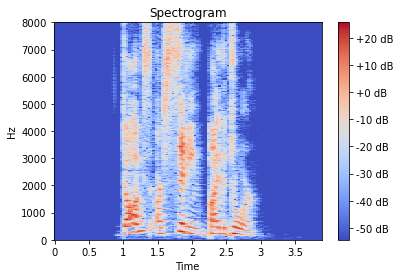

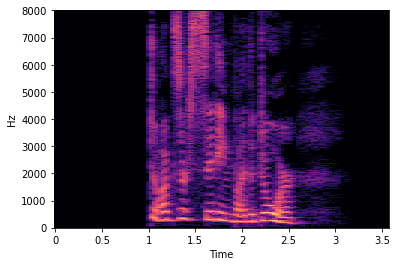

In [50]:
import glob
n= 1
for file in glob.glob("/Users/iqrabismi/Desktop/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
    # Load audio file
    
    audio_file = file
    y, sr = librosa.load(audio_file, sr=None)
    n= n+1
    if n==5:
        break

    # Calculate spectrogram using STFT
    spectrogram = librosa.stft(y)

    # Convert power spectrogram to decibels
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

    # Plot spectrogram
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='hz')
    n= n+1
    if n==5:
        break
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()


## Modelling

#### In the following code, we will be initializing an instance of the MLPClassifier. This classifier is known as a Multi-layer Perceptron Classifier, which is a type of neural network used for classification tasks. It works by optimizing the log-loss function using LBFGS or stochastic gradient descent algorithms. Unlike other classifiers like SVM or Naive Bayes, the MLPClassifier has an internal neural network that enables it to classify the data. The neural network is designed to be a feedforward ANN model, which means that the input data flows in a single direction, from the input layer through the hidden layers to the output layer.

In [108]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [109]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [110]:
y_pred=model.predict(x_test)

In [111]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

In [112]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.73%


In [114]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

<AxesSubplot:>

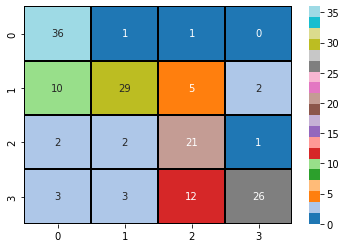

In [116]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidth=2, linecolor='black', cmap='tab20')

In [ ]:
precision_score, recall_score

In [118]:
print("Precision is ", precision_score(y_test, y_pred,average='weighted'))

Precision is  0.7687408505722039


In [119]:
print("Recall is ", recall_score(y_test, y_pred,average='weighted'))

Recall is  0.7272727272727273
